7장 코드

In [1]:
visitors_to_A = 1300
visitors_to_B = 1275
conversions_from_A = 120
conversions_from_B = 125

In [2]:
from scipy.stats import beta
alpha_prior = 1
beta_prior = 1
posterior_A = beta(alpha_prior + conversions_from_A,
    beta_prior + visitors_to_A - conversions_from_A)
posterior_B = beta(alpha_prior + conversions_from_B,
    beta_prior + visitors_to_B - conversions_from_B)


In [3]:
samples = 20000 # 더 나은 근사를 위해서는 이 값이 더 커야 한다 # We want this to be large to get a better approximation.
samples_posterior_A = posterior_A.rvs(samples)
samples_posterior_B = posterior_B.rvs(samples)
print ((samples_posterior_A > samples_posterior_B).mean())

0.31255


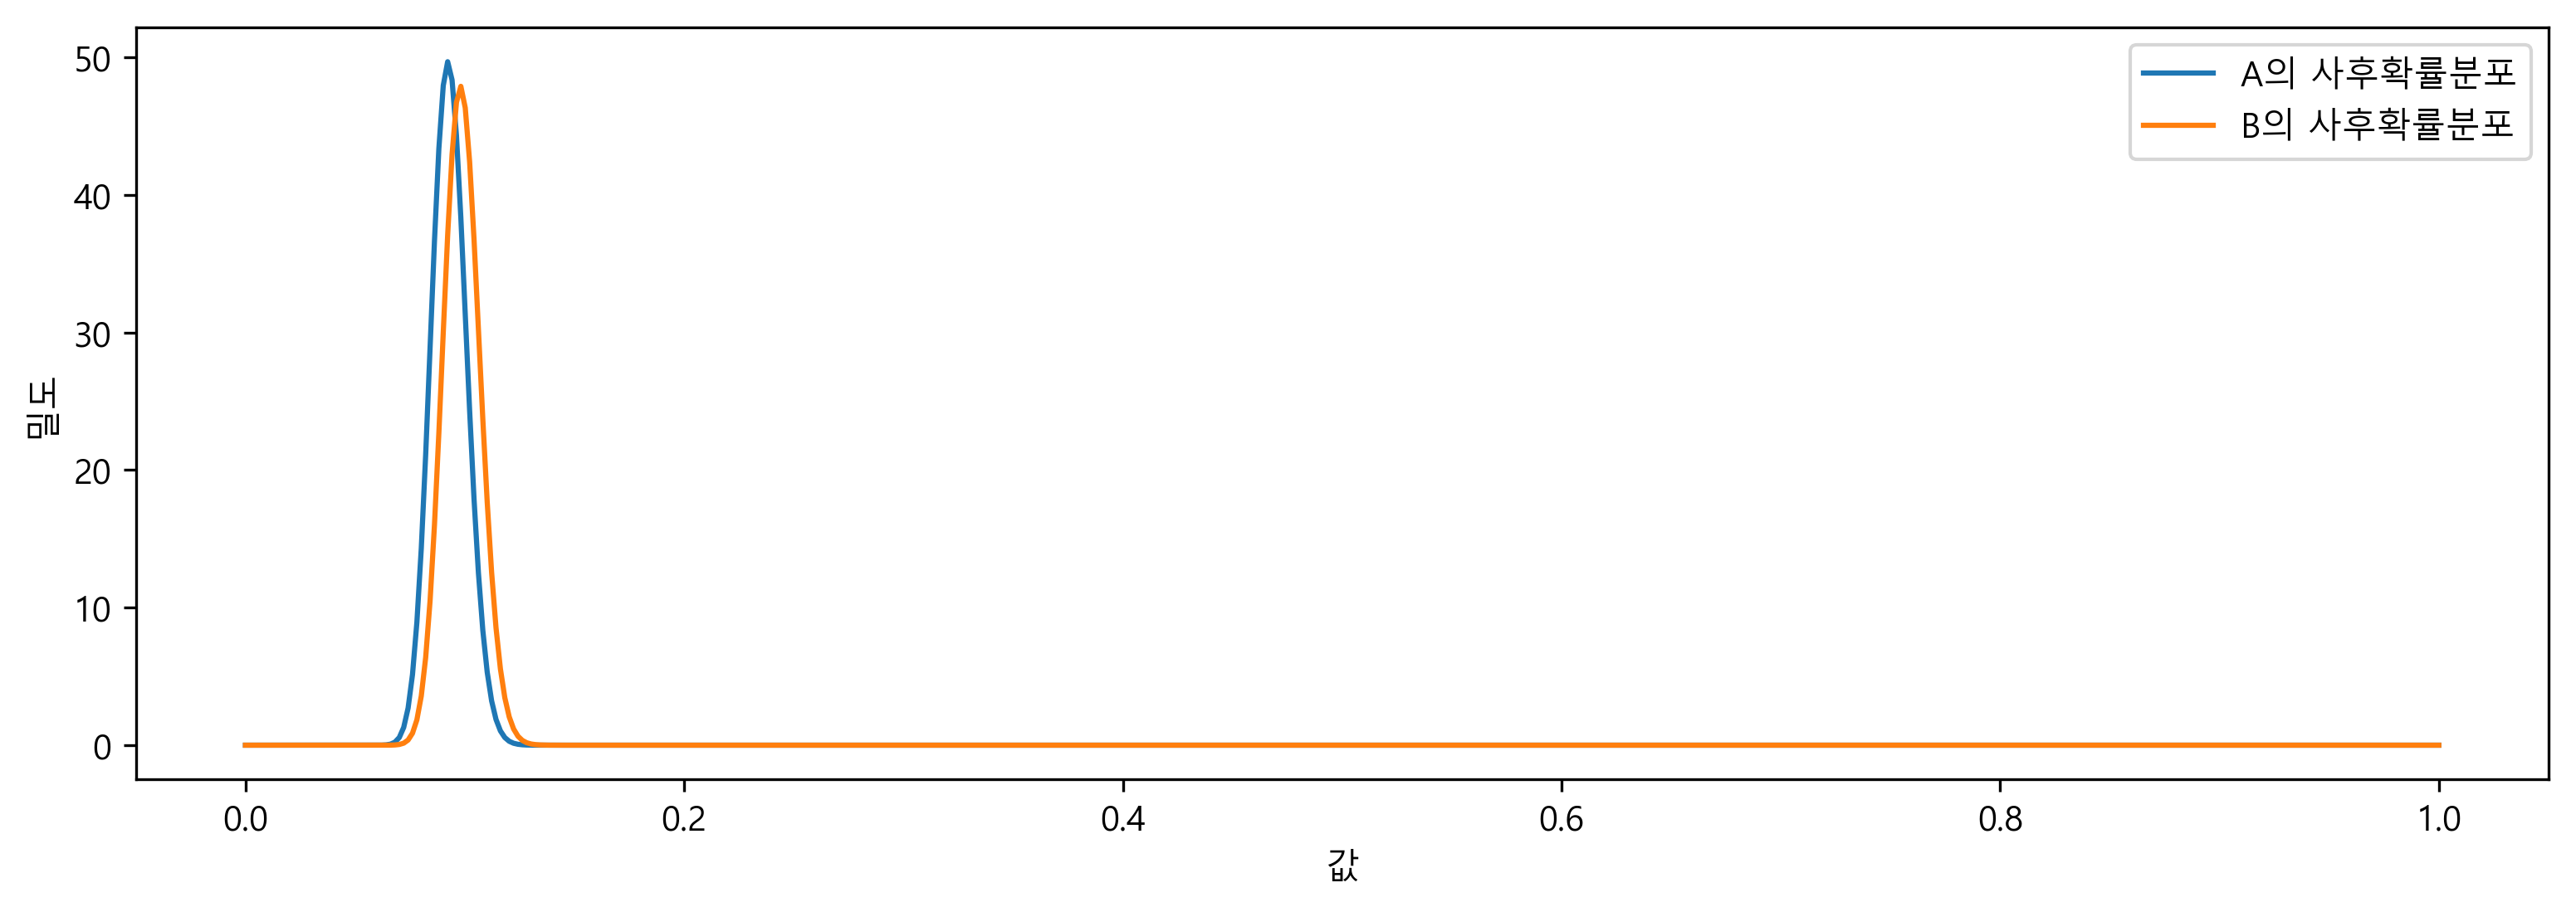

In [4]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

matplotlib.rc('font', family='Malgun Gothic')  # 그림 한글 폰트 지정, 맑은 고딕
figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
x = np.linspace(0,1, 500)
plt.plot(x, posterior_A.pdf(x), label='A의 사후확률분포')
plt.plot(x, posterior_B.pdf(x), label='B의 사후확률분포')
plt.xlabel('값')
plt.ylabel('밀도')
#plt.title("웹페이지 $A$ 와 $B$의 전환율에 대한 사후확률분포")
plt.legend();



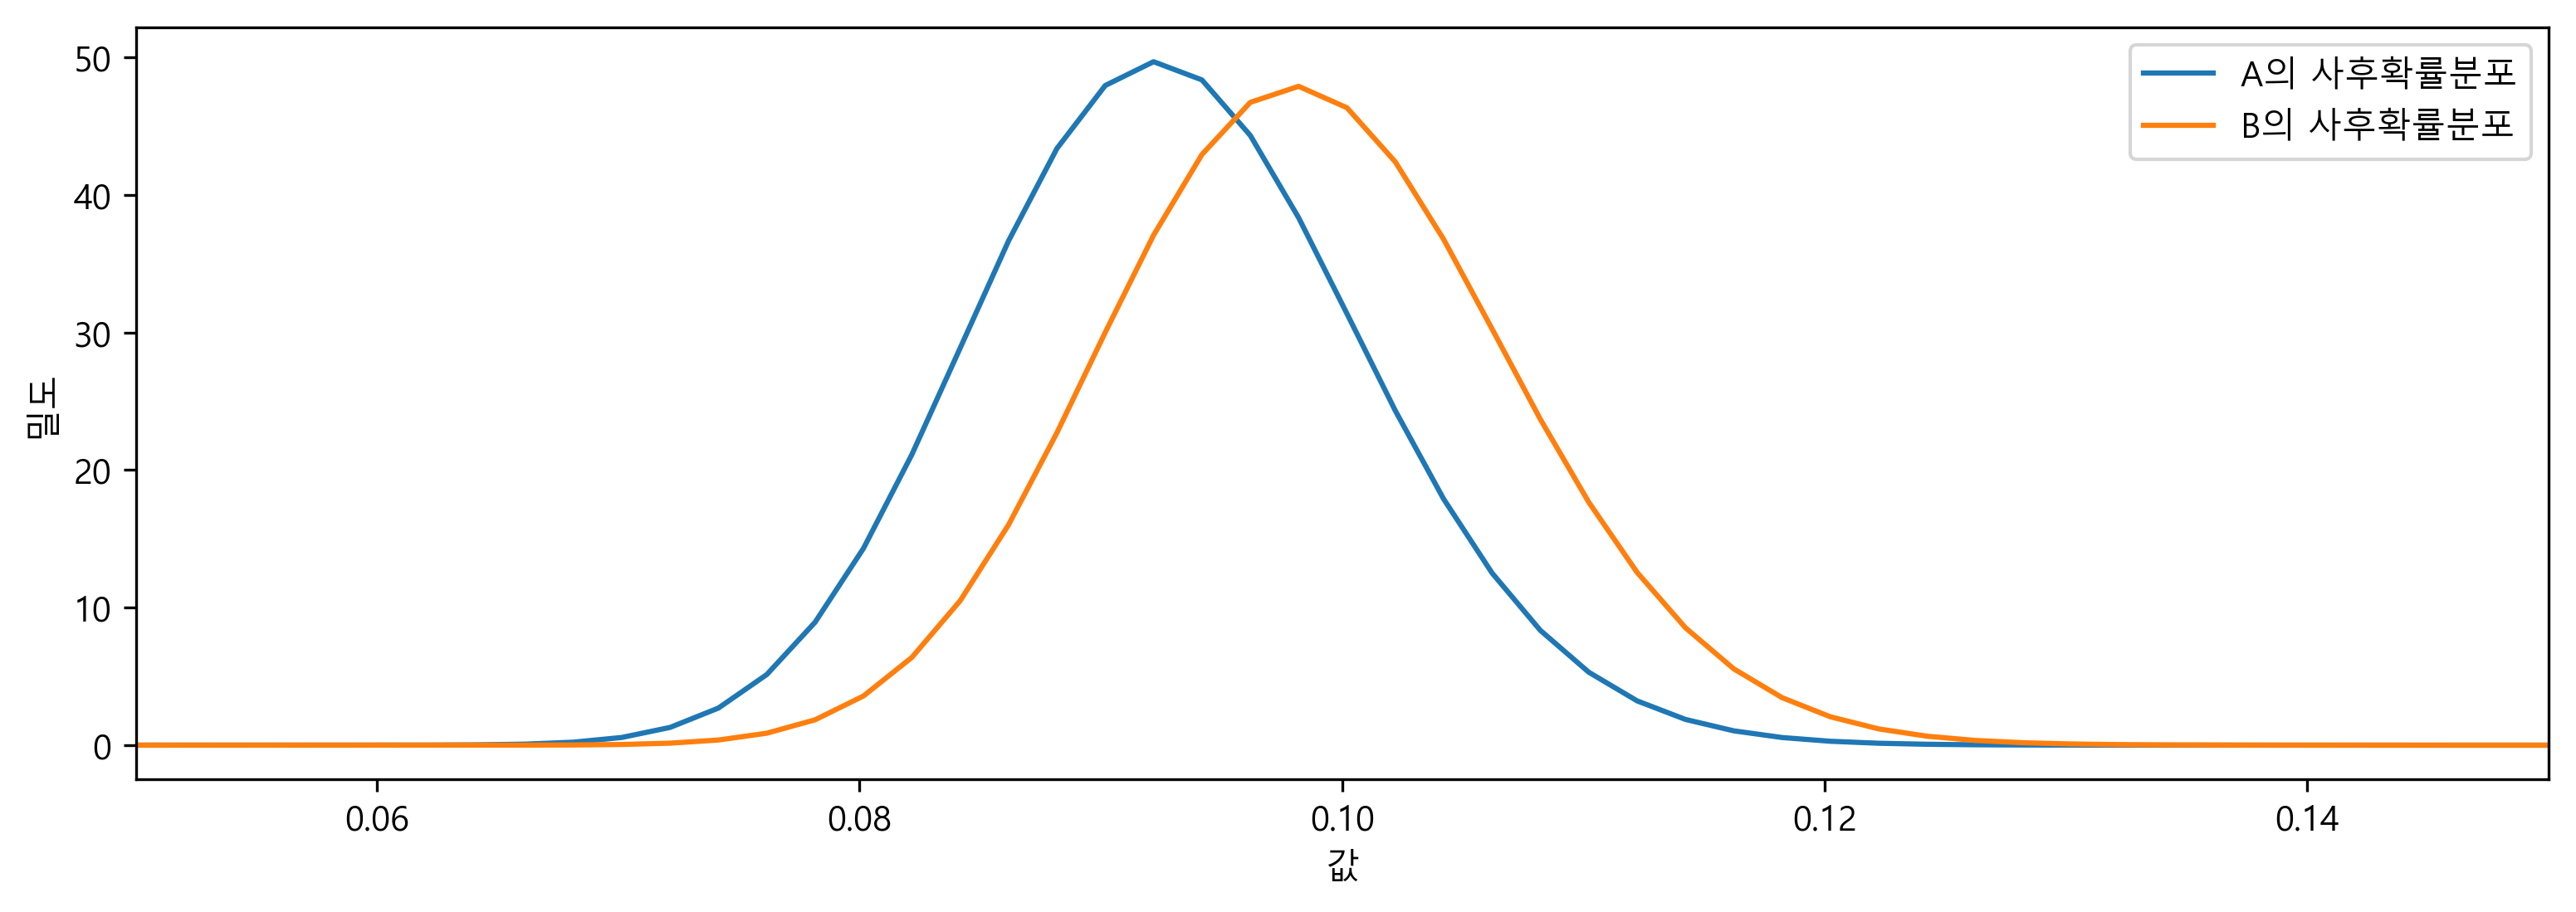

In [5]:
plt.plot(x, posterior_A.pdf(x), label='A의 사후확률분포')
plt.plot(x, posterior_B.pdf(x), label='B의 사후확률분포')
plt.xlim(0.05, 0.15)
plt.xlabel('값')
plt.ylabel('밀도')
#plt.title("웹페이지 $A$ 와 $B$의 전환율에 대한 사후확률분포(확대)")
plt.legend();

In [6]:
from numpy.random import multinomial
P = [0.5, 0.2, 0.3]
N = 1
print (multinomial(N, P))

[0 0 1]


In [7]:
N = 10
print (multinomial(N, P))

[7 0 3]


In [8]:
from numpy.random import dirichlet
sample = dirichlet([1,1]) #[1,1]은 Beta(1,1)에 해당한다 # [1,1] is equivalent to a Beta(1,1)
# distribution.
# 분포
print (sample)
print (sample.sum())

[ 0.86950098  0.13049902]
1.0


In [9]:
sample = dirichlet([1,1,1,1])
print (sample)
print (sample.sum())

[ 0.2989064   0.37507744  0.11076511  0.21525105]
1.0


In [10]:
N = 1000
N_79 = 10
N_49 = 46
N_25 = 80
N_0 = N - (N_79 + N_49 + N_49)
observations = np.array([N_79, N_49, N_25, N_0])
prior_parameters = np.array([1,1,1,1])
posterior_samples = dirichlet(prior_parameters + observations,
    size=10000)
print ("Two random samples from the posterior:")
print (posterior_samples[0])
print (posterior_samples[1])

Two random samples from the posterior:
[ 0.00965855  0.0458771   0.080278    0.86418635]
[ 0.01453719  0.04674605  0.07496422  0.86375254]


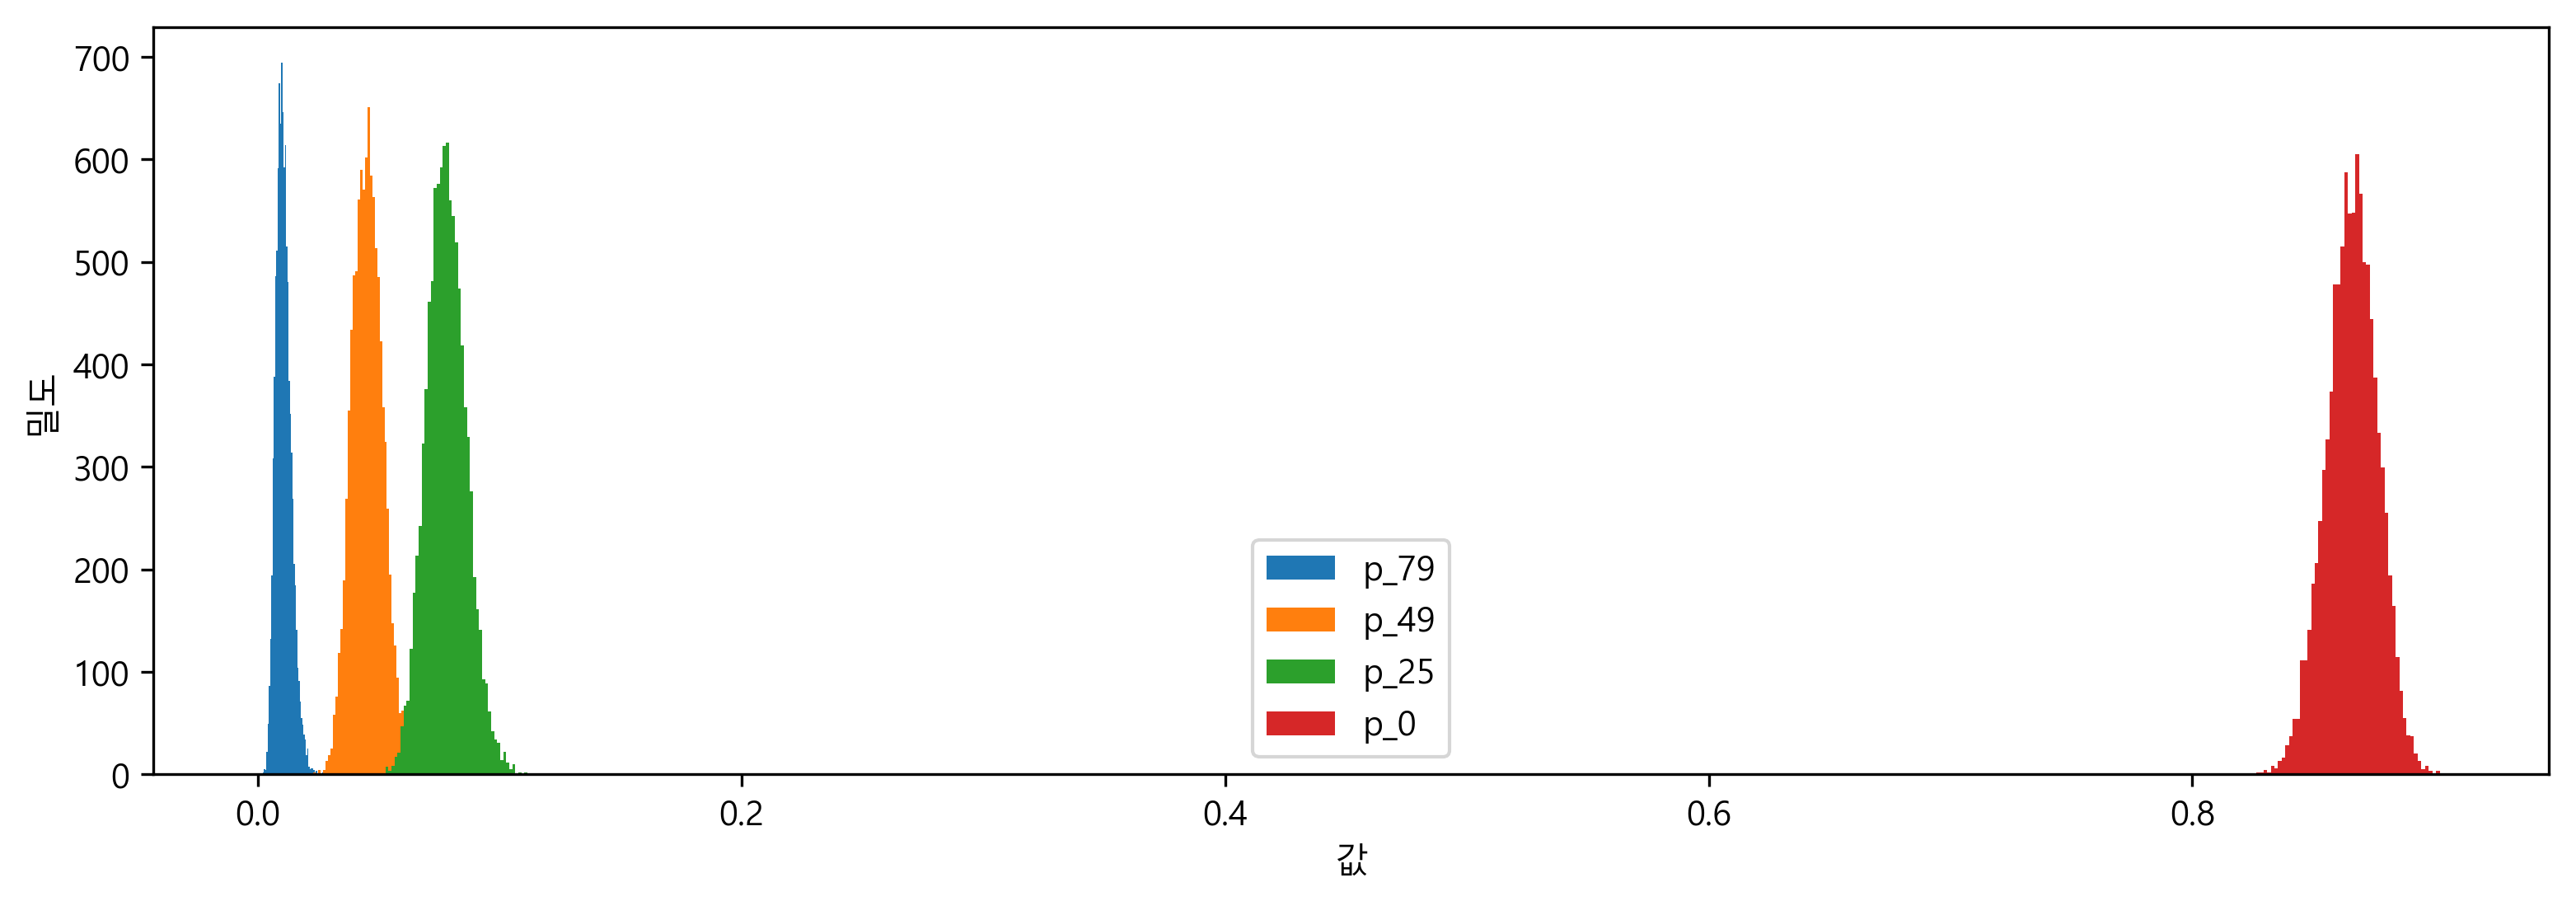

In [11]:
for i, label in enumerate(['p_79', 'p_49', 'p_25', 'p_0']):
    ax = plt.hist(posterior_samples[:,i], bins=50,
        label=label, histtype='stepfilled')
plt.xlabel('값')
plt.ylabel('밀도')
#plt.title("여러 가격 선택의 사후확률분포 ")
plt.legend();

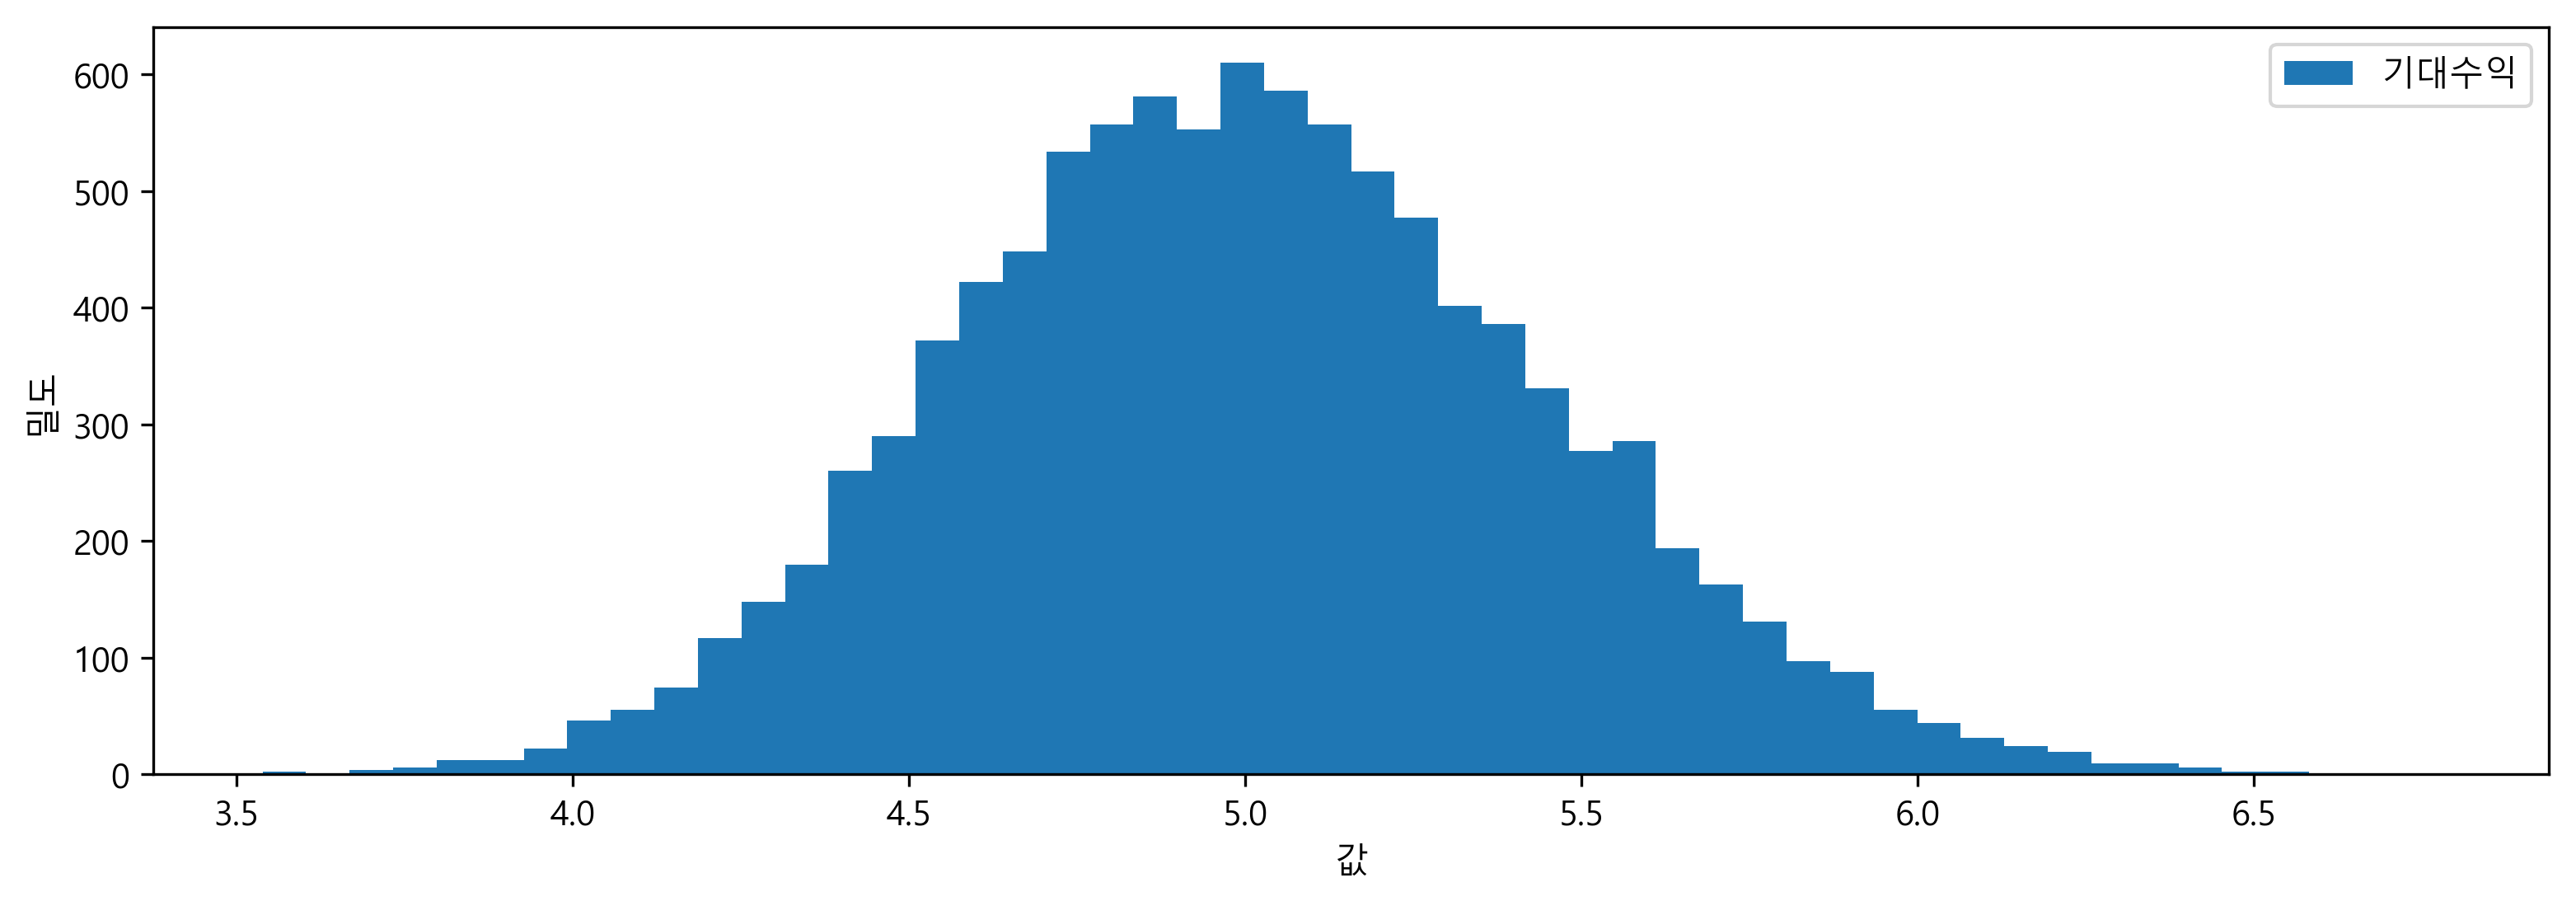

In [12]:
def expected_revenue(P):
    return 79*P[:,0] + 49*P[:,1] + 25*P[:,2] + 0*P[:,3]

#posterior_expected_revenue = expected_value(posterior_samples)
#코드 수정: value -> revenue
#제대로 고친 것이 맞는지 확인 부탁드립니다.
# 넵 OK 맞아요
posterior_expected_revenue = expected_revenue(posterior_samples)

plt.hist(posterior_expected_revenue, histtype='stepfilled',label='기대수익', bins=50)
plt.xlabel('값')
plt.ylabel('밀도')
#plt.title("기대수익에 대한 사후확률분포")
plt.legend();

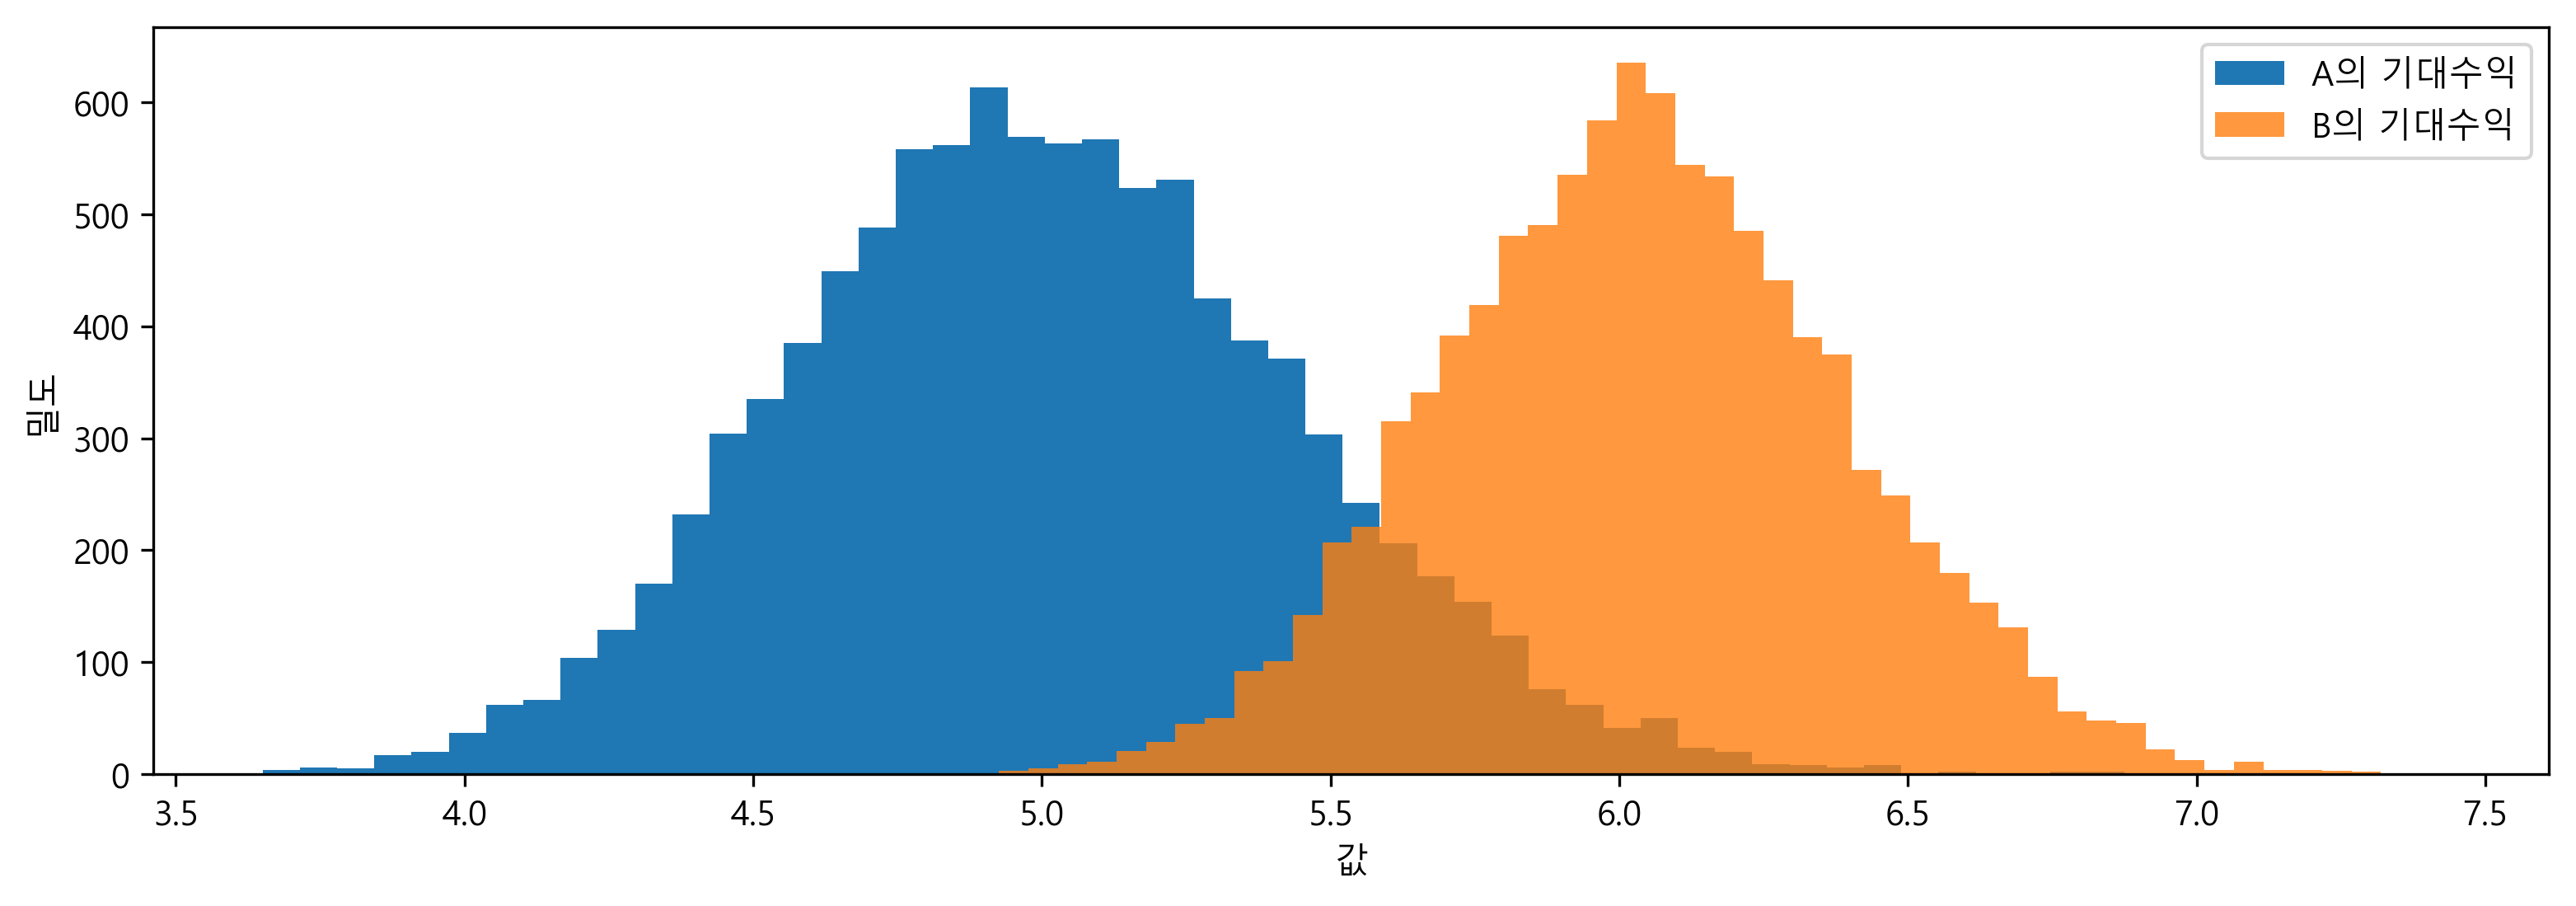

In [13]:
N_A = 1000
N_A_79 = 10
N_A_49 = 46
N_A_25 = 80
N_A_0 = N_A - (N_A_79 + N_A_49 + N_A_49)
observations_A = np.array([N_A_79, N_A_49, N_A_25, N_A_0])

N_B = 2000
N_B_79 = 45
N_B_49 = 84
N_B_25 = 200
N_B_0 = N_B - (N_B_79 + N_B_49 + N_B_49)
observations_B = np.array([N_B_79, N_B_49, N_B_25, N_B_0])

prior_parameters = np.array([1,1,1,1])

posterior_samples_A = dirichlet(prior_parameters + observations_A,
    size=10000)
posterior_samples_B = dirichlet(prior_parameters + observations_B,
    size=10000)


#posterior_expected_revenue_A = expected_value(posterior_samples_A)
#posterior_expected_revenue_B = expected_value(posterior_samples_B)
# 위 두 코드도 수정하였습니다. value -> revenue
# 확인 부탁합니다.
# 넵 OK 맞아요
posterior_expected_revenue_A = expected_revenue(posterior_samples_A)
posterior_expected_revenue_B = expected_revenue(posterior_samples_B)

plt.hist(posterior_expected_revenue_A, histtype='stepfilled',
    label='A의 기대수익', bins=50)
plt.hist(posterior_expected_revenue_B, histtype='stepfilled',
    label='B의 기대수익', bins=50, alpha=0.8)
plt.xlabel('값')
plt.ylabel('밀도')
#plt.title("$A$ 와 $B$ 간의 기대수익의 사후확률분포")
plt.legend();

In [14]:
p = (posterior_expected_revenue_B > posterior_expected_revenue_A).mean()
print ("Probability that page B has a higher revenue than page A: %.3f"%p)

Probability that page B has a higher revenue than page A: 0.967


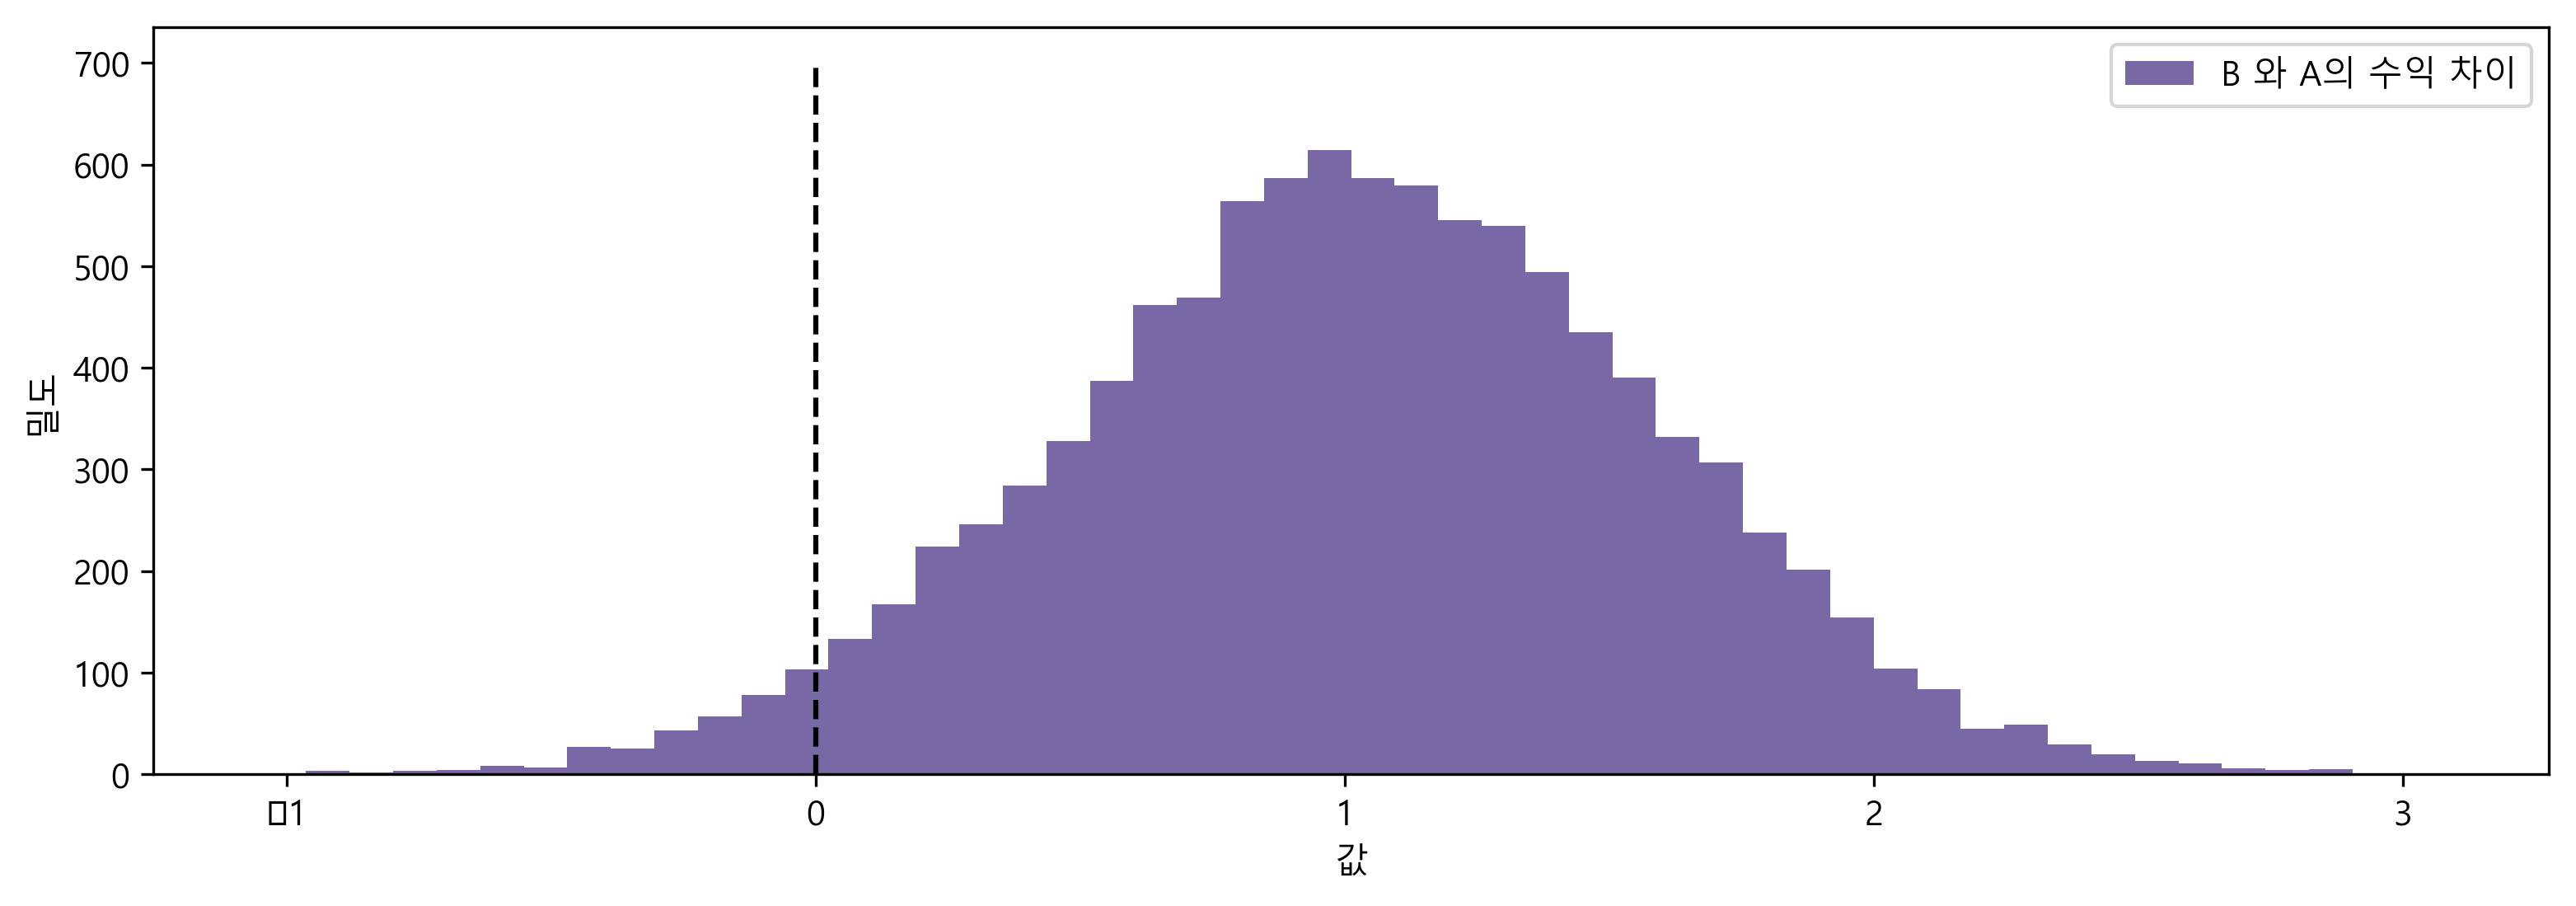

In [15]:
posterior_diff = posterior_expected_revenue_B - posterior_expected_revenue_A
plt.hist(posterior_diff, histtype='stepfilled', color='#7A68A6',
    label='B 와 A의 수익 차이', bins=50)
plt.vlines(0, 0, 700, linestyles='--')
plt.xlabel('값')
plt.ylabel('밀도')
#plt.title("$A$ 와 $B$의 기대수익간 델타의 사후확률분포")
plt.legend();

In [16]:
N = 250
mu_A, std_A = 30, 4
mu_B, std_B = 26, 7
# create durations (seconds) users are on the pages for
# 사용자가 페이지에 머무는 시간(초단위)을 만든다
durations_A = np.random.normal(mu_A, std_A, size=N)
durations_B = np.random.normal(mu_B, std_B, size=N)

print (durations_A[:8])
print (durations_B[:8])

[ 32.43011327  31.09198796  29.27250074  22.52177508  25.09159691
  31.44496939  30.15805537  27.36799925]
[ 23.57446839  16.63997598  28.29337271  31.42624601  19.2933363
  30.84181572  18.07131671  24.03957524]


In [17]:
import pymc as pm
pooled_mean = np.r_[durations_A, durations_B].mean()
pooled_std = np.r_[durations_A, durations_B].std()
tau = 1./np.sqrt(1000.*pooled_std) # PyMC uses a precision
# parameter, 1/sigma**2
mu_A = pm.Normal("mu_A", pooled_mean, tau)
mu_B = pm.Normal("mu_B", pooled_mean, tau)

In [18]:
std_A = pm.Uniform("std_A", pooled_std/1000., 1000.*pooled_std)
std_B = pm.Uniform("std_B", pooled_std/1000., 1000.*pooled_std)

In [19]:
nu_minus_1 = pm.Exponential("nu-1", 1./29)

In [20]:
obs_A = pm.NoncentralT("obs_A", mu_A, 1.0/std_A**2, nu_minus_1 + 1,
    observed=True, value=durations_A)
obs_B = pm.NoncentralT("obs_B", mu_B, 1.0/std_B**2, nu_minus_1 + 1,
    observed=True, value=durations_B)
mcmc = pm.MCMC([obs_A, obs_B, mu_A, mu_B, std_A, std_B, nu_minus_1])
mcmc.sample(25000,10000)

 [-----------------100%-----------------] 25000 of 25000 complete in 8.2 sec

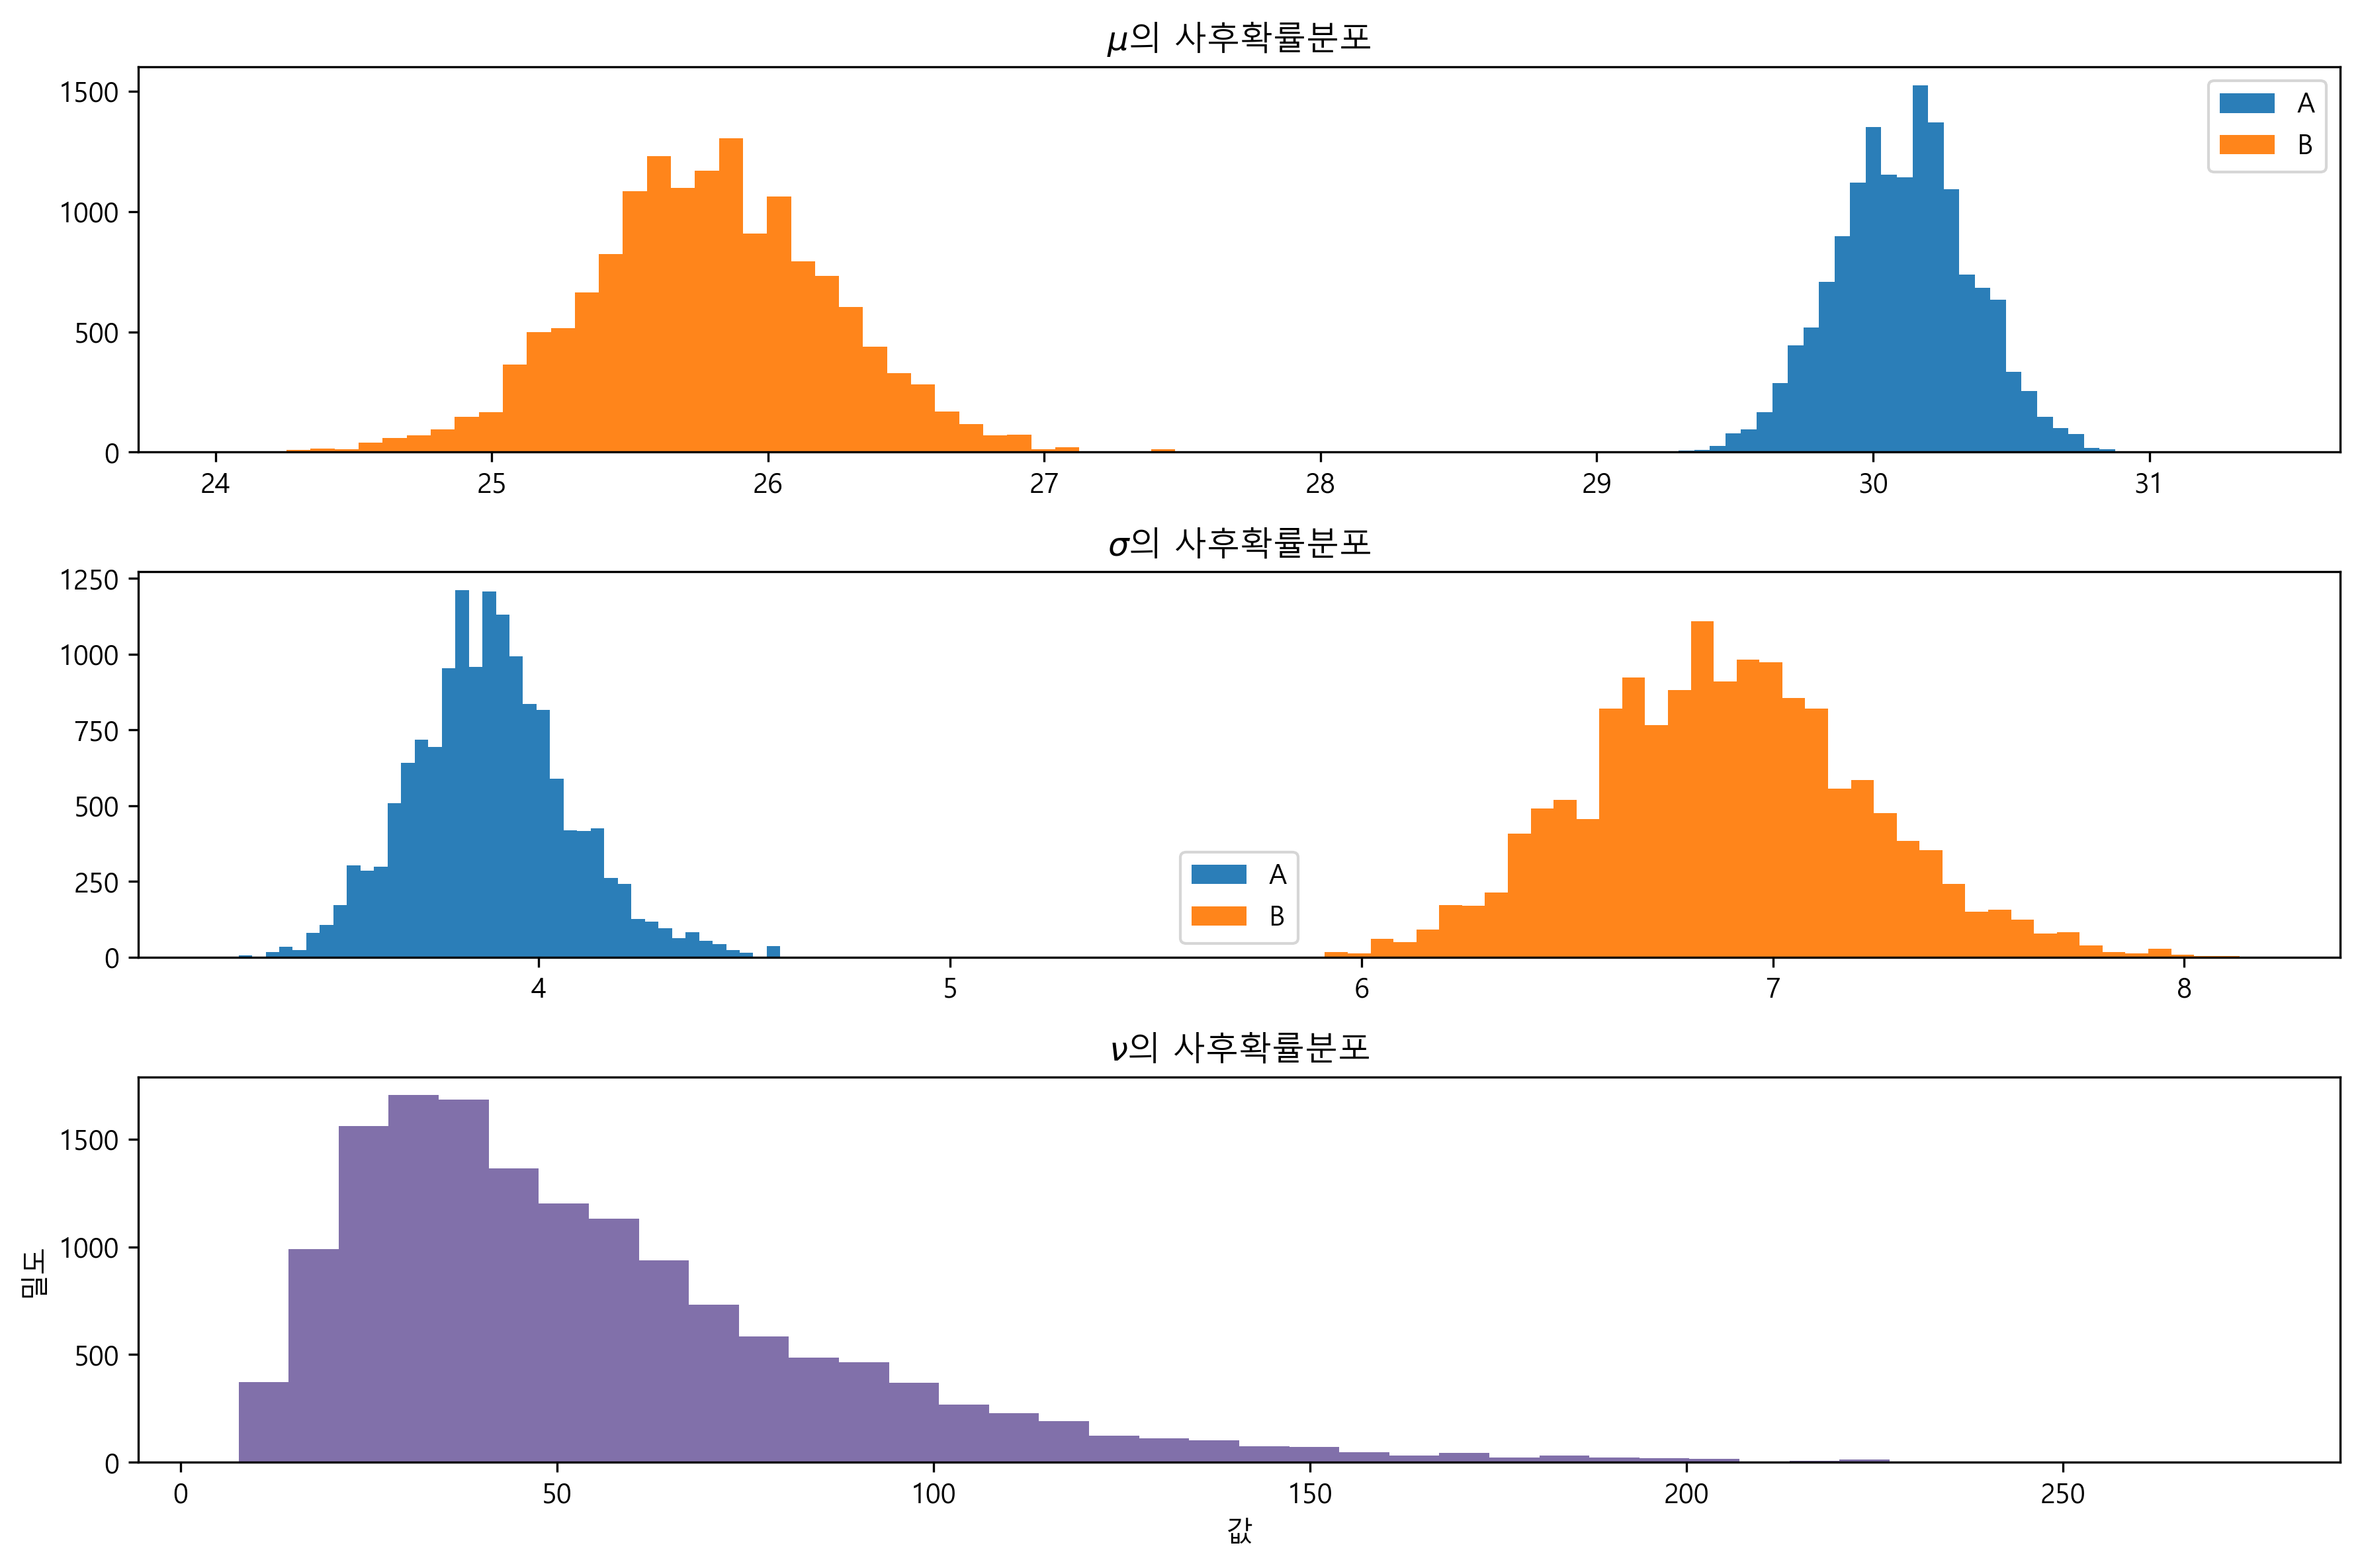

In [21]:
mu_A_trace, mu_B_trace = mcmc.trace('mu_A')[:], mcmc.trace('mu_B')[:]
std_A_trace, std_B_trace = mcmc.trace('std_A')[:], mcmc.trace('std_B')[:]
nu_trace = mcmc.trace("nu-1")[:] + 1

figsize(12,8)

def _hist(data, label, **kwargs):
    return plt.hist(data, bins=40, histtype='stepfilled',
        alpha=.95, label=label, **kwargs)

ax = plt.subplot(3,1,1)
_hist(mu_A_trace,'A')
_hist(mu_B_trace,'B')
plt.legend()
plt.title('$\mu$의 사후확률분포')

ax = plt.subplot(3,1,2)
_hist(std_A_trace, 'A')
_hist(std_B_trace, 'B')
plt.legend()
plt.title('$\sigma$의 사후확률분포')

ax = plt.subplot(3,1,3)
_hist(nu_trace,'', color='#7A68A6')
plt.title(r'$\nu$의 사후확률분포')
plt.xlabel('값')
plt.ylabel('밀도')
plt.tight_layout();

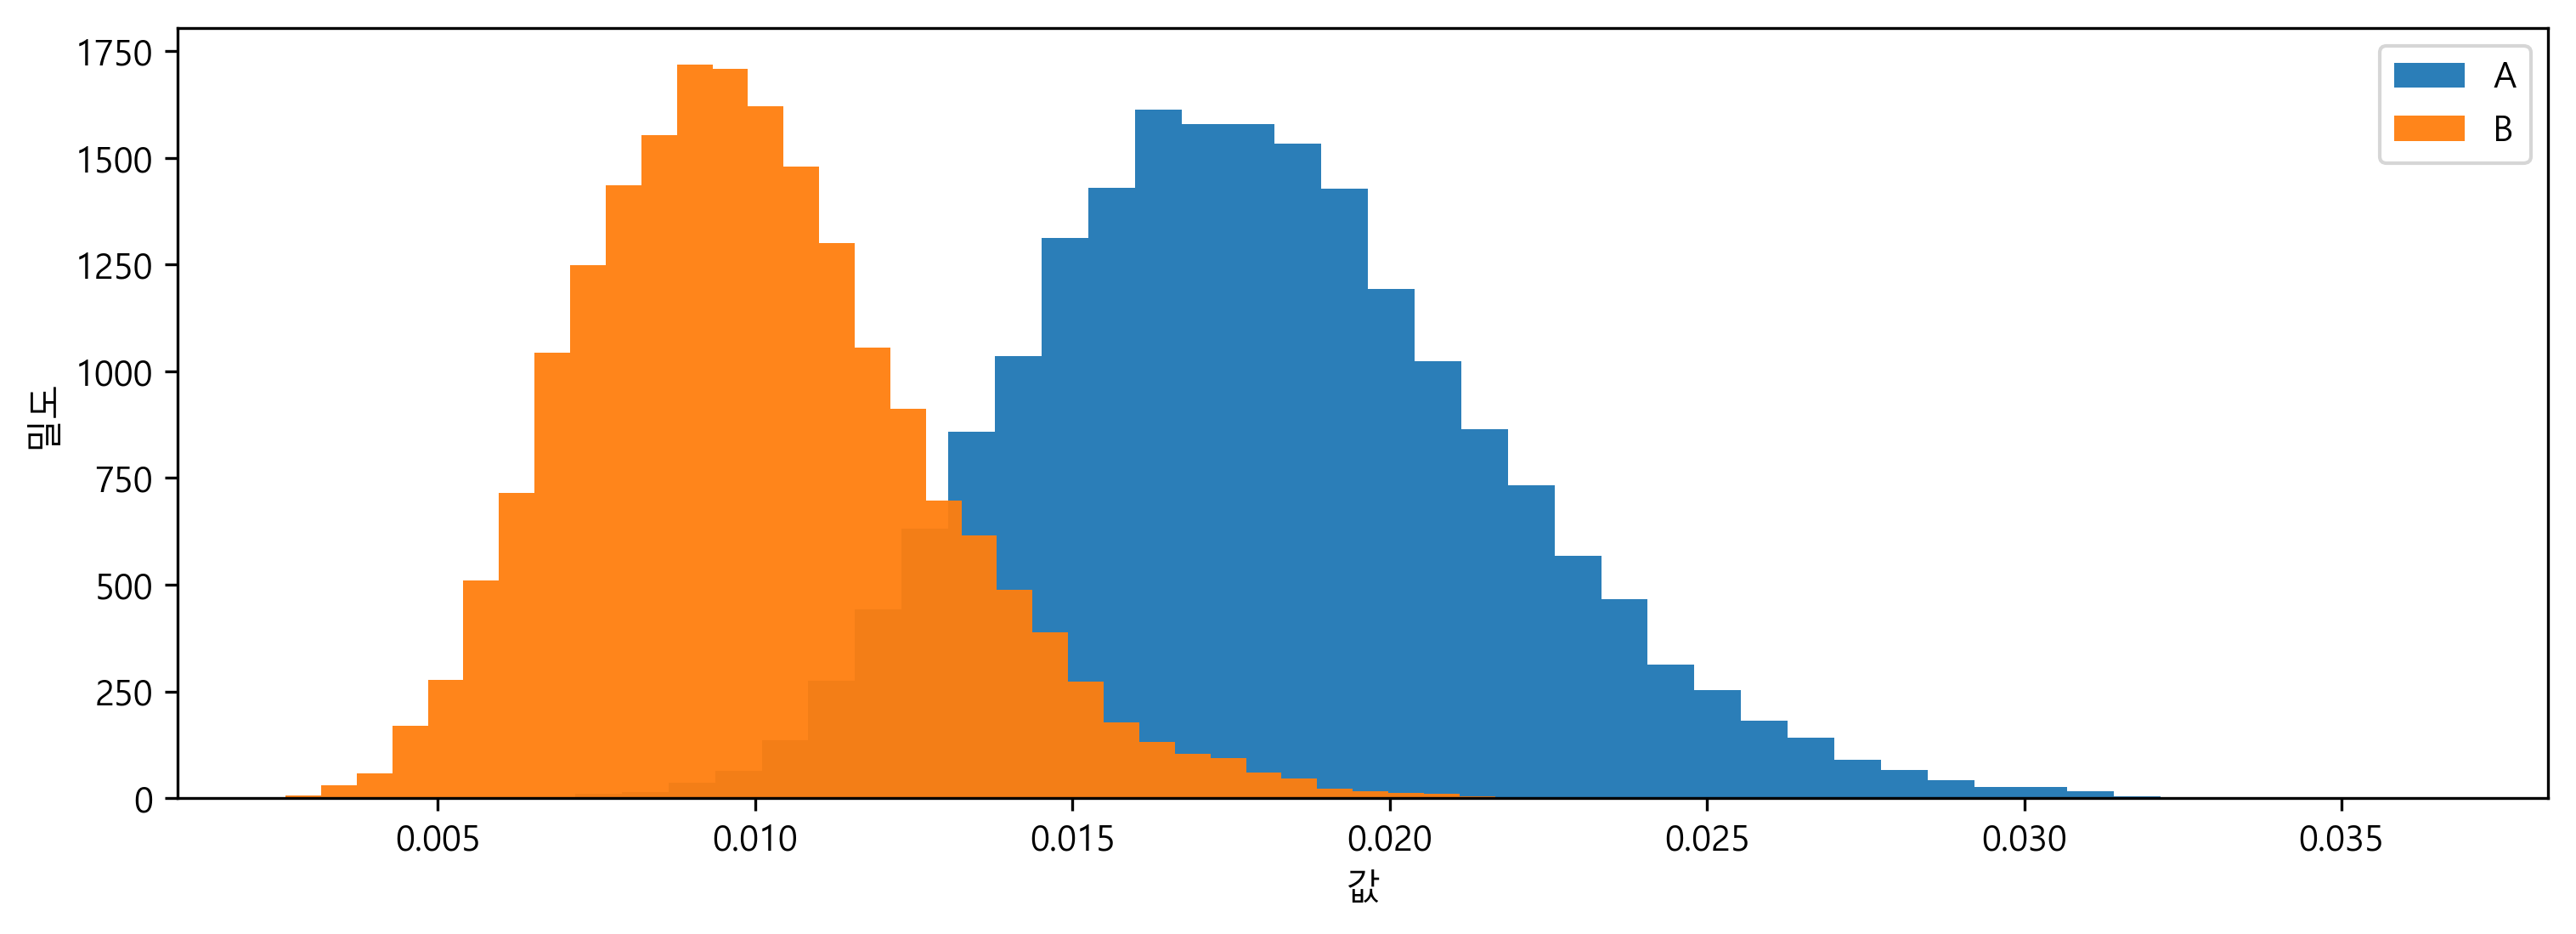

In [22]:
figsize(12,4)
visitors_to_A = 1275
visitors_to_B = 1300
conversions_from_A = 22
conversions_from_B = 12
alpha_prior = 1
beta_prior = 1

posterior_A = beta(alpha_prior + conversions_from_A,
    beta_prior + visitors_to_A - conversions_from_A)
posterior_B = beta(alpha_prior + conversions_from_B,
    beta_prior + visitors_to_B - conversions_from_B)

samples = 20000
samples_posterior_A = posterior_A.rvs(samples)
samples_posterior_B = posterior_B.rvs(samples)

_hist(samples_posterior_A, 'A')
_hist(samples_posterior_B, 'B')

plt.xlabel('값')
plt.ylabel('밀도')
#plt.title("웹페이지 $A$ 와 $B$의 전환율에 대한 사후확률분포")
plt.legend();

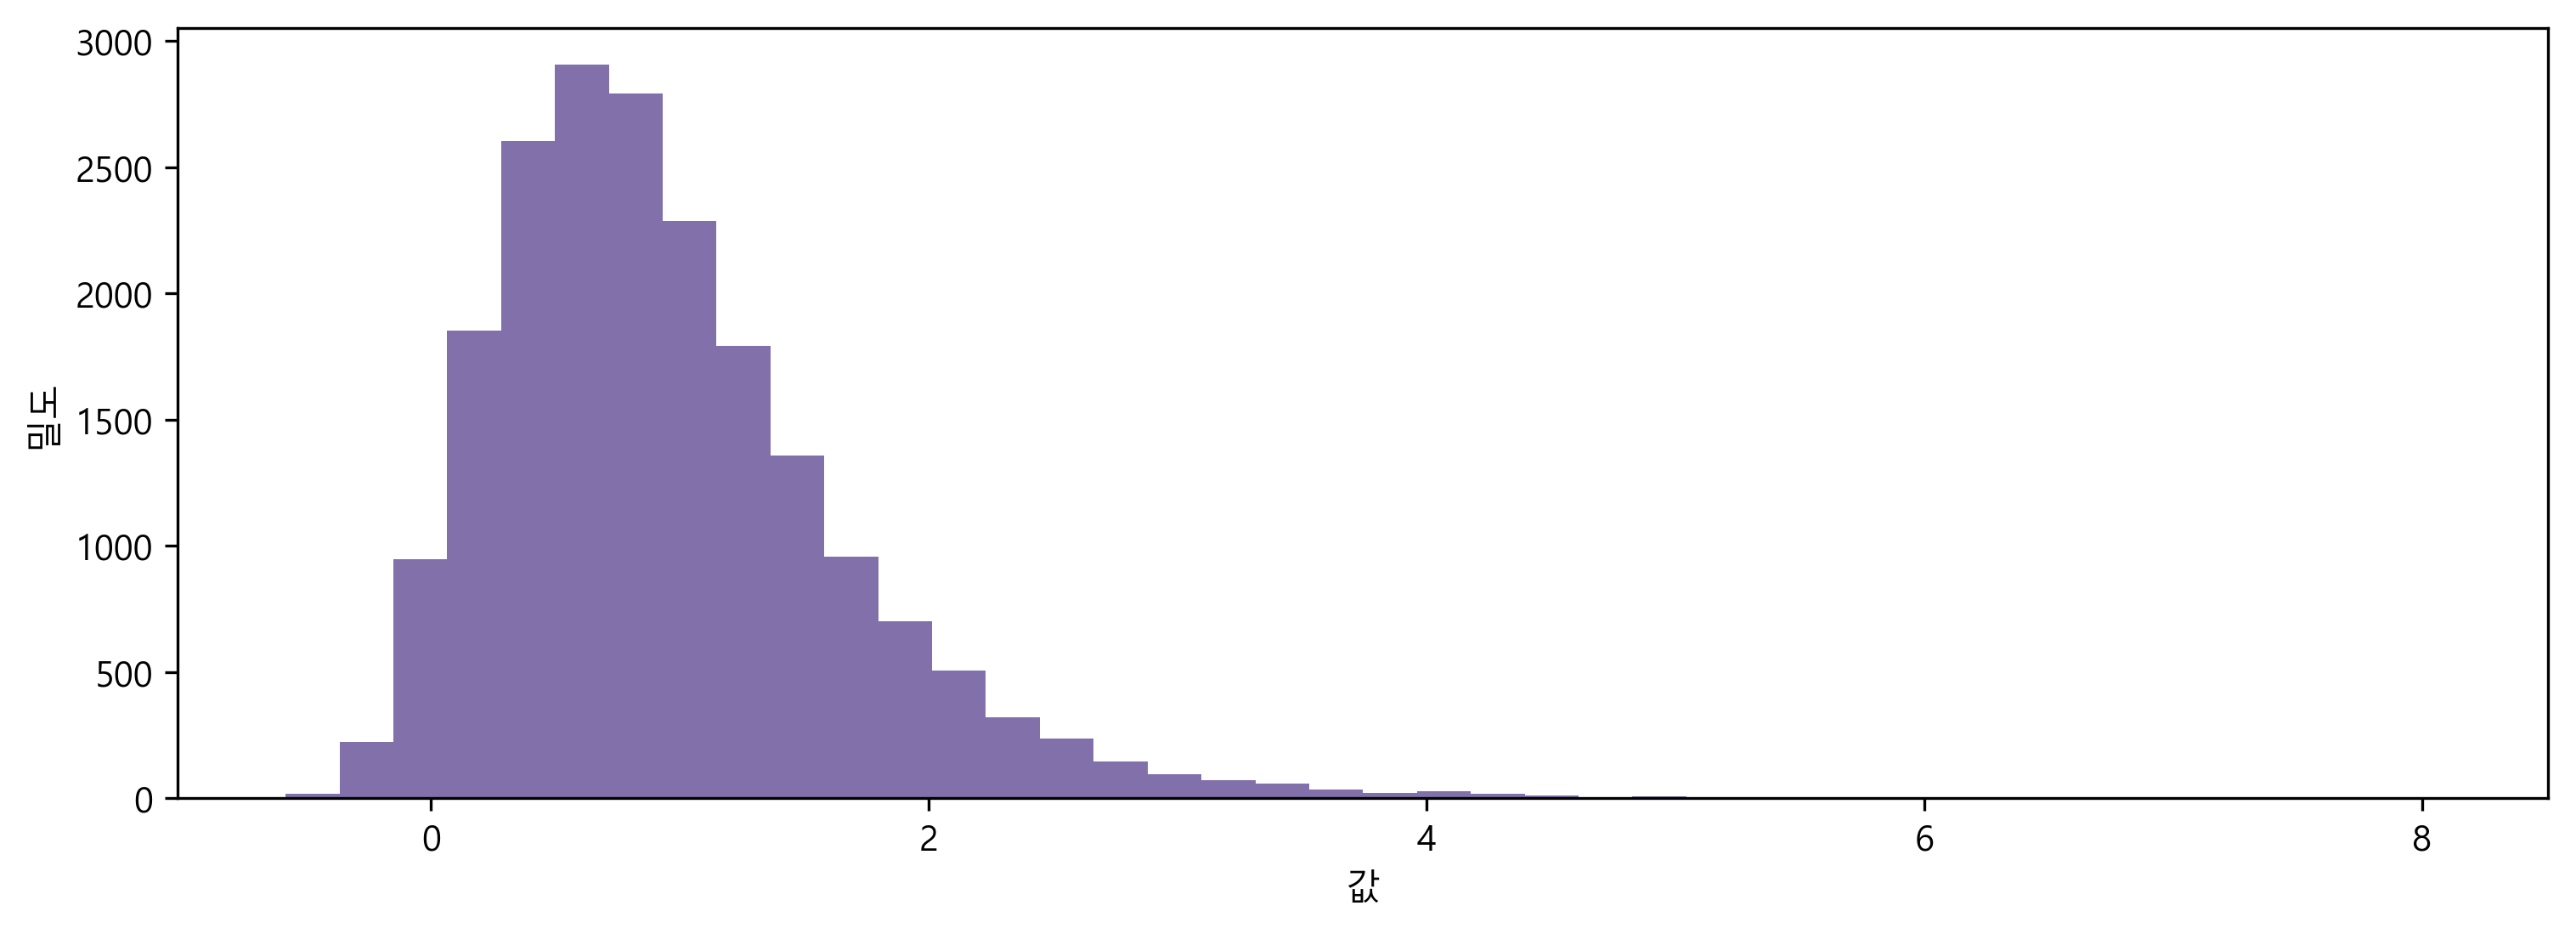

In [23]:
def relative_increase(a,b):
    return (a-b)/b
posterior_rel_increase = relative_increase(samples_posterior_A,
    samples_posterior_B)
plt.xlabel('값')
plt.ylabel('밀도')
#plt.title("웹페이지 B의 전환율에 대한 웹페이지 A의 전환율 상대적 증가에 대한 사후확률분포")
_hist(posterior_rel_increase, 'relative increase', color='#7A68A6');

In [24]:
print ((posterior_rel_increase > 0.2).mean())
print ((posterior_rel_increase > 0.5).mean())

0.888
0.7163


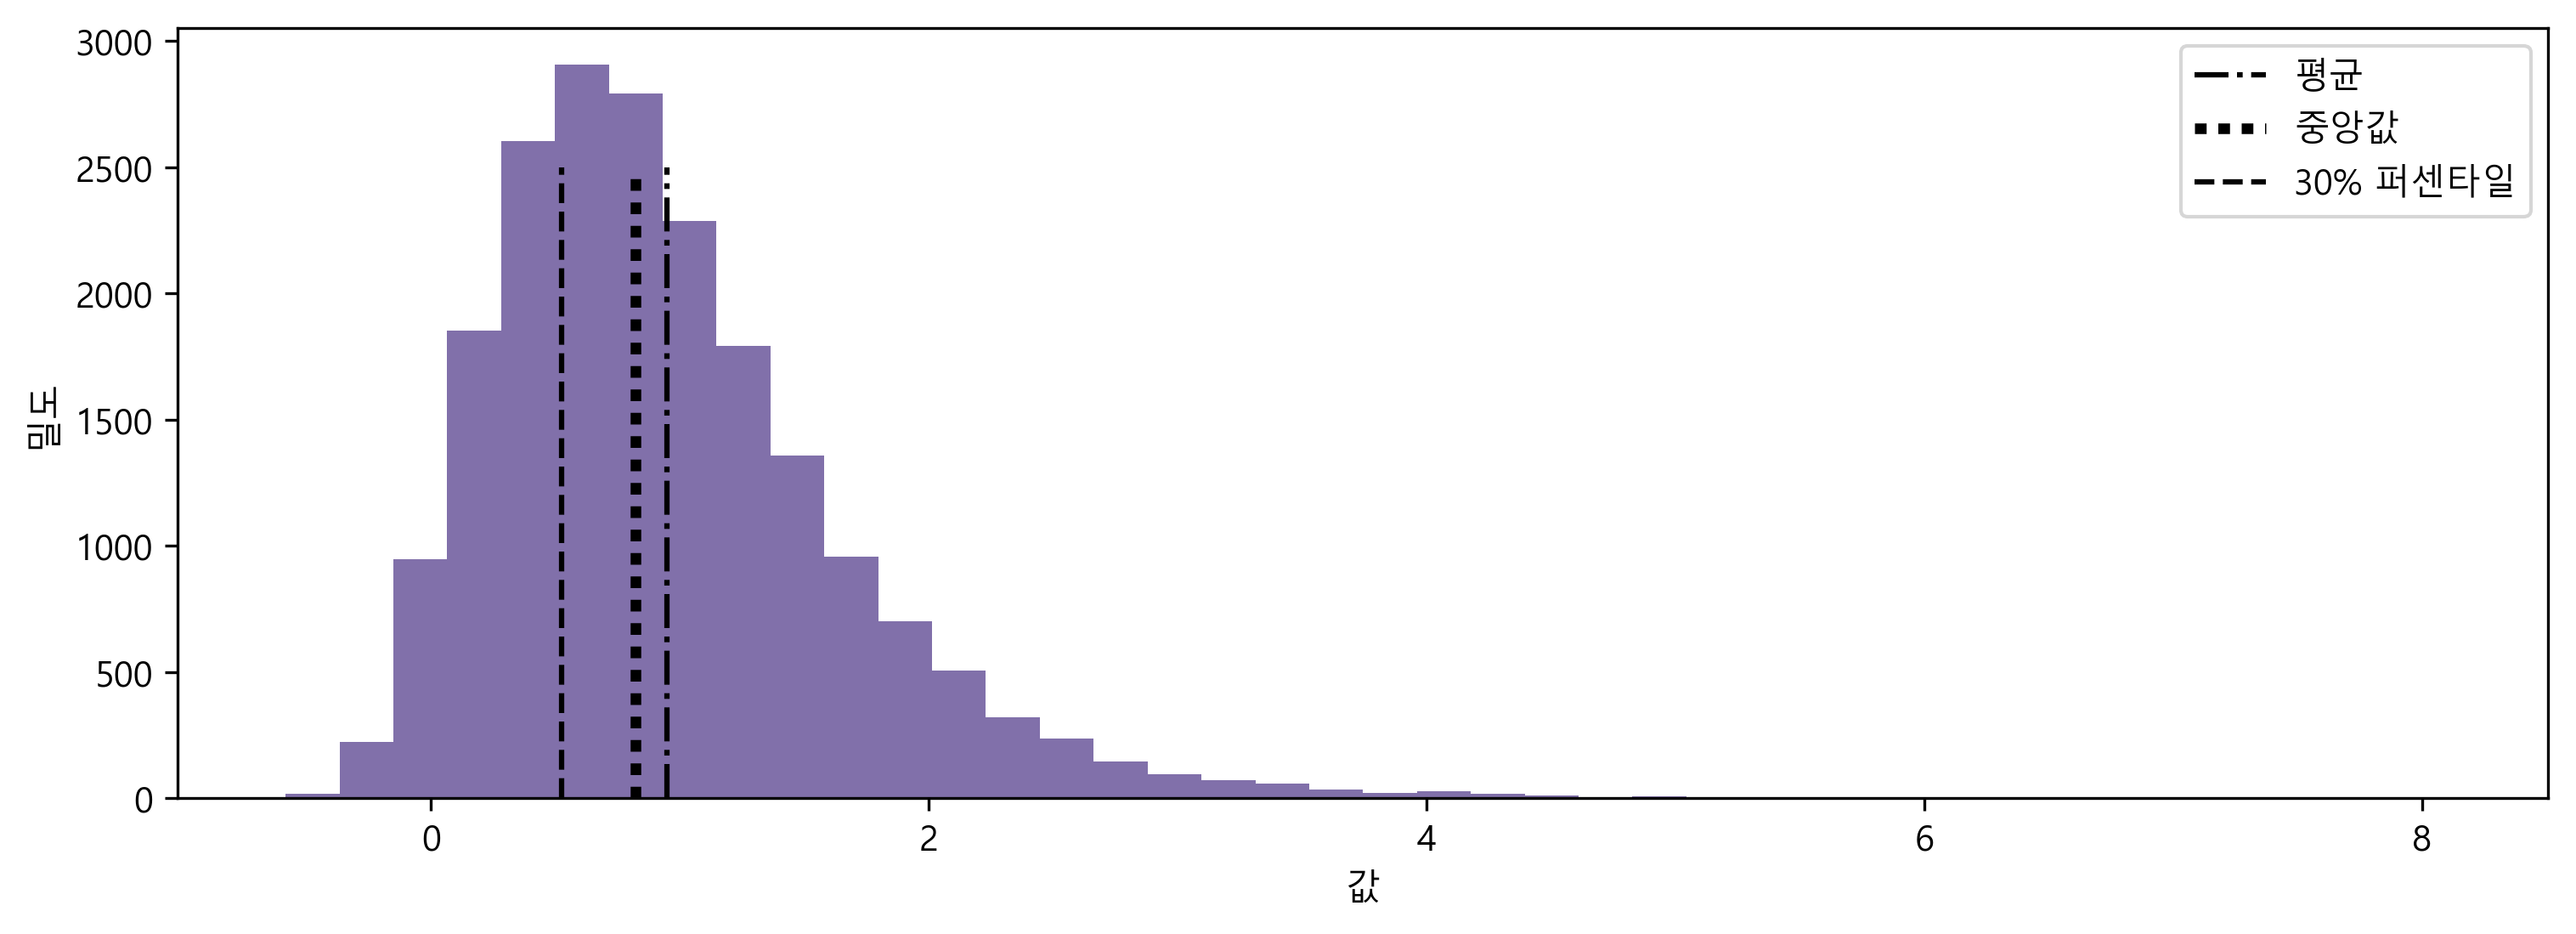

In [25]:
mean = posterior_rel_increase.mean()
median = np.percentile(posterior_rel_increase, 50)
conservative_percentile = np.percentile(posterior_rel_increase, 30)
_hist(posterior_rel_increase,'', color='#7A68A6');
plt.vlines(mean, 0, 2500, linestyles='-.', label='평균')
plt.vlines(median, 0, 2500, linestyles=':', label='중앙값', lw=3)
plt.vlines(conservative_percentile, 0, 2500, linestyles='--',
    label='30% 퍼센타일')
plt.xlabel('값')
plt.ylabel('밀도')
#plt.title("상대적 증가에 대한 사후확률분포의 여러 요약통계량")
plt.legend();